<a href="https://colab.research.google.com/github/atreyu595/Stock-Analysis/blob/main/BABAAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Stock Analysis: BABA
#Atreyu Jasper Laxa Cortez
#Date: 28th August 2019

#Technical analysis of Alibaba Stock ($BABA)
#Determining whether stock is a viable investment opportunity 
#Business Fundementals: Excellent
# - Leverage and reported success in Cloud Services and Computing
# - Increasing presence in e-commerce platforms and merchandising within Asia
# - Recent partnership of Shipping/Freighting services -> Very Good News, Increases freighting solutions, 
# - ANT Group IPO, $35 Billion USD -> biggest IPO of all time!!!
# - Strong foothold in China -> retail, shopping search engines, cloud computing

In [56]:
#Import necessary data analysis and mathematical tools 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



In [28]:
#Upload dataset 'BABA.csv' 
from google.colab import files
file = files.upload()

Saving BABA.csv to BABA (1).csv


Text(0.5, 1.0, 'Alibaba Adj. Close Price')

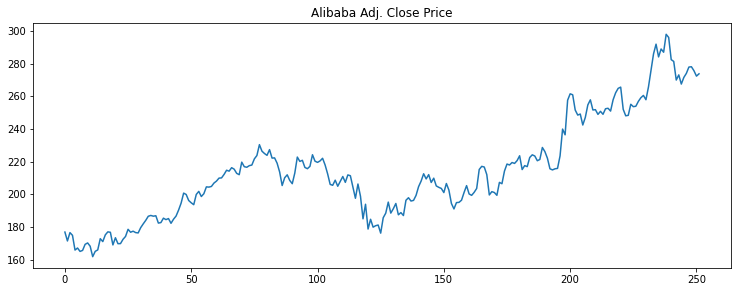

In [30]:
#
dataInitial = pd.read_csv('BABA.csv')
plt.figure(figsize = (12.5, 4.5))
plt.plot(dataInitial['Adj Close'], label = 'BABA')
plt.title('Alibaba Adj. Close Price')

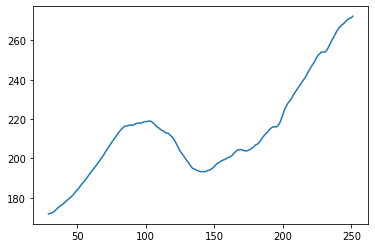

In [31]:
simpleMoveAvg30 = pd.DataFrame()
simpleMoveAvg30['Adj Close'] = dataInitial['Adj Close'].rolling(30).mean()
plt.plot(simpleMoveAvg30)

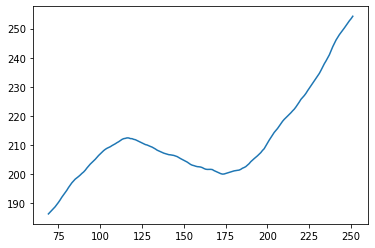

In [41]:
simpleMoveAvg50 = pd.DataFrame()
simpleMoveAvg50['Adj Close'] = dataInitial['Adj Close'].rolling(70).mean()
plt.plot(simpleMoveAvg50)

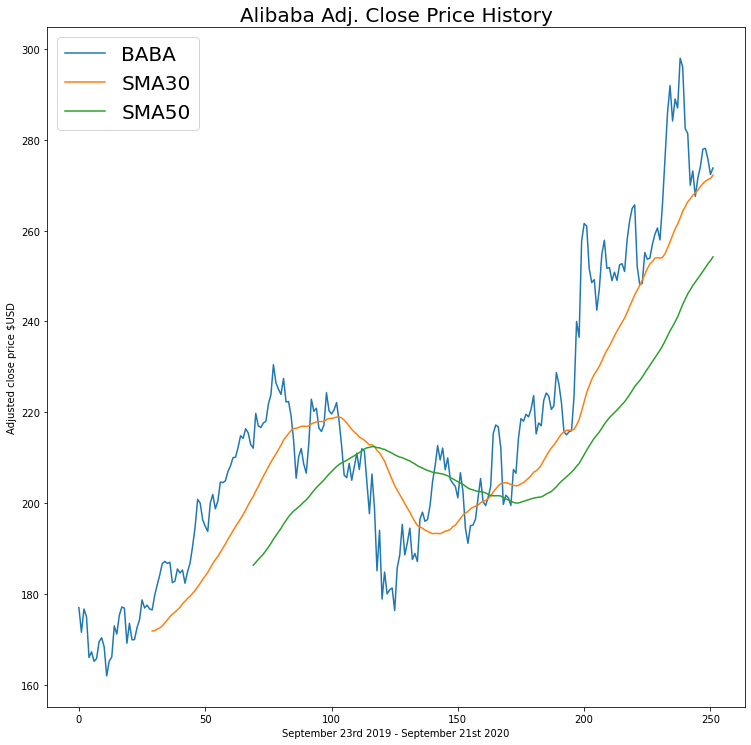

In [42]:
plt.figure(figsize=(12.5, 12.5))
plt.plot(dataInitial['Adj Close'], label = 'BABA')
plt.plot(simpleMoveAvg30['Adj Close'], label = 'SMA30')
plt.plot(simpleMoveAvg50['Adj Close'], label = 'SMA50')
plt.title('Alibaba Adj. Close Price History', fontsize = 20)
plt.ylabel('Adjusted close price $USD')
plt.xlabel('September 23rd 2019 - September 21st 2020')
plt.legend(loc = 'upper left', fontsize = 20)

#in such case since the short term average "orange is below" long term average at the
#centre of the trend, it can indicate a buying/entry point
#entering at this stage then resulted in a bullish momentum onwards

In [ ]:
data = pd.DataFrame()
data['BABA'] = dataInitial['Adj Close'] 
data['SMA30'] = simpleMoveAvg30['Adj Close']
data['SMA50'] = simpleMoveAvg50['Adj Close']
data

,BABA,SMA30,SMA50
0,176.979996,NaN,NaN
1,171.550003,NaN,NaN
2,176.660004,NaN,NaN
3,175.000000,NaN,NaN
4,165.979996,NaN,NaN
...,...,...,...
247,277.959991,270.378999,262.931999
248,278.140015,270.910333,263.764600
249,275.720001,271.270666,264.125400
250,272.410004,271.495000,264.342000


In [53]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data['BABA'])):
    if data['SMA30'][i] > data['SMA50'][i]:
      if flag != 1:
        sigPriceBuy.append(data['BABA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA50'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['BABA'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)


In [54]:
buy_sell = buy_sell(data)
data['buySignalPrice'] = buy_sell[0]
data['sellSignalPrice'] = buy_sell[1]

In [50]:
data

,BABA,SMA30,SMA50,buySignalPrice,sellSignalPrice
0,176.979996,NaN,NaN,NaN,NaN
1,171.550003,NaN,NaN,NaN,NaN
2,176.660004,NaN,NaN,NaN,NaN
3,175.000000,NaN,NaN,NaN,NaN
4,165.979996,NaN,NaN,NaN,NaN
...,...,...,...,...,...
247,277.959991,270.378999,262.931999,NaN,NaN
248,278.140015,270.910333,263.764600,NaN,NaN
249,275.720001,271.270666,264.125400,NaN,NaN
250,272.410004,271.495000,264.342000,NaN,NaN


Text(0.5, 0, 'September 23rd 2019 - September 21st 2020')

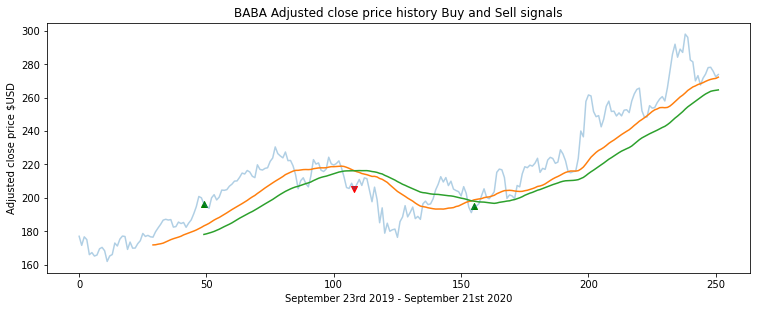

In [58]:
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['BABA'], label = 'BABA', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30')
plt.plot(data['SMA50'], label = 'SMA50')
plt.scatter(data.index, data['buySignalPrice'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['sellSignalPrice'], label = 'Sell', marker = 'v', color = 'red')
plt.title('BABA Adjusted close price history Buy and Sell signals')
plt.ylabel('Adjusted close price $USD')
plt.xlabel('September 23rd 2019 - September 21st 2020')

In [ ]:
#Analysis:
#Around 50th day, buy signal -> continuing on for a bullish trend more than 50 days after
#Sell signal at around 110th day -> COVID-19, China fears played huge role in market crash within China, Hong Kong/Shanghai Stock Exchange turned over
#huge loses within the next few month
#buy signal at around 154th day -> leverage and recent performance of BABA due to strong merchandising and shopping demand through e-commerce in China, 
#strong earnings reports and EPS beat Analyst expectations,

#Here on out good news -> Buy ratings from several analysts from Truist, Nomura Instincts, Bank Of America etc, ANT IPO, reports of success in cloud services and expecting profits 
#within the Q1 or Q2. 